<a href="https://colab.research.google.com/github/LeonardoGoncRibeiro/01_DataScienceUsingPython/blob/main/04_InsuranceCompany_InferencesUsingPandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pandas: Data treatment and data visualization

Pandas is a very powerful tool for data manipulation using Python. With Pandas, one is able to easily assess information from data, check for any missing values, and make statistical inferences based on data.

In this file, we will show how to analyze data using Pandas. For that end, we will assume that our data comes from a fabricated insurance company. This company has to analyze and understand data, and try to make inferences on this data. Our task is to use Pandas (and Matplotlib, for visualization) to help this company.

**Problem:** We were hired by a insurance company and our boss told us that we should get some data (from file 'aluguel.csv') and make some inferences from it. This data has information regarding thousands of houses in Rio de Janeiro, Brazil.

We need to be able to read this data, understand it and perform valuable inferences.


First, we need to import Pandas library and read the csv file.


In [802]:
%reset-f

In [803]:
import pandas as pd

dataset = pd.read_csv('aluguel.csv', sep = ';')

This is our dataset, as a Pandas dataframe.

In [804]:
dataset

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
...,...,...,...,...,...,...,...,...,...
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0
32958,Apartamento,Leblon,2,0,0,70,3000.0,760.0,NaN


In [805]:
type(dataset)

pandas.core.frame.DataFrame

## General information about our dataset

To understand the type of data we are dealing with, we can use the method *dtypes*

In [806]:
dataset.dtypes

Tipo           object
Bairro         object
Quartos         int64
Vagas           int64
Suites          int64
Area            int64
Valor         float64
Condominio    float64
IPTU          float64
dtype: object

The number of entries and the number of columns in our dataset can be assessed using the *shape* method

In [807]:
dataset.shape

(32960, 9)

In [808]:
print(f'Our data set has {dataset.shape[0]} entries (houses) and {dataset.shape[1]} parameters')

Our data set has 32960 entries (houses) and 9 parameters


Furthermore, we may easily get some important information from our data by just using the *info( )* method.

In [809]:
dataset.info( )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32960 entries, 0 to 32959
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        32960 non-null  object 
 1   Bairro      32960 non-null  object 
 2   Quartos     32960 non-null  int64  
 3   Vagas       32960 non-null  int64  
 4   Suites      32960 non-null  int64  
 5   Area        32960 non-null  int64  
 6   Valor       32943 non-null  float64
 7   Condominio  28867 non-null  float64
 8   IPTU        22723 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 2.3+ MB


Our data has 32960 entries. Each line corresponds to a house, and there are 9 columns that describe our data. These are: Tipo, Bairro, Quartos, Vagas, Suites, Area, Valor, Condominio, IPTU.

Note that there are some missing values in Valor, Condominio and IPTU.

Since our data is very heavy, we may want to read only the first couple of lines to help us in understanding it. Thus, we may use the method *head( )*

## Extra: How to import other types of data?

Using Pandas, we may also get data from different sources, such as .json, .txt, and others.

For .json files, for instance, we may use the *read_json( )* function

In [810]:
json = open('aluguel.json')
print(json.read())

[{"Tipo":"Quitinete","Bairro":"Copacabana","Quartos":1,"Vagas":0,"Suites":0,"Area":40,"Valor":1700.0,"Condominio":500.0,"IPTU":60.0},
{"Tipo":"Casa","Bairro":"Jardim Bot\u00e2nico","Quartos":2,"Vagas":0,"Suites":1,"Area":100,"Valor":7000.0,"Condominio":null,"IPTU":null},
{"Tipo":"Conjunto Comercial\/Sala","Bairro":"Barra da Tijuca","Quartos":0,"Vagas":4,"Suites":0,"Area":150,"Valor":5200.0,"Condominio":4020.0,"IPTU":1111.0},
{"Tipo":"Apartamento","Bairro":"Centro","Quartos":1,"Vagas":0,"Suites":0,"Area":15,"Valor":800.0,"Condominio":390.0,"IPTU":20.0},
{"Tipo":"Apartamento","Bairro":"Higien\u00f3polis","Quartos":1,"Vagas":0,"Suites":0,"Area":48,"Valor":800.0,"Condominio":230.0,"IPTU":null},
{"Tipo":"Apartamento","Bairro":"Vista Alegre","Quartos":3,"Vagas":1,"Suites":0,"Area":70,"Valor":1200.0,"Condominio":null,"IPTU":null},
{"Tipo":"Apartamento","Bairro":"Cachambi","Quartos":2,"Vagas":0,"Suites":0,"Area":50,"Valor":1300.0,"Condominio":301.0,"IPTU":17.0},
{"Tipo":"Casa de Condom\u00edni

In [811]:
df_json = pd.read_json('aluguel.json')
df_json

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200,NaN,NaN
6,Apartamento,Cachambi,2,0,0,50,1300,301.0,17.0
7,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000,NaN,NaN
8,Casa de Condomínio,Ramos,2,2,0,65,1000,NaN,NaN
9,Conjunto Comercial/Sala,Centro,0,3,0,695,35000,19193.0,3030.0


For .txt files, on the other hand, we use the *read_table( )* function

In [812]:
df_txt = pd.read_table('aluguel.txt')
df_txt

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200,NaN,NaN
6,Apartamento,Cachambi,2,0,0,50,1300,301.0,17.0
7,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000,NaN,NaN
8,Casa de Condomínio,Ramos,2,2,0,65,1000,NaN,NaN
9,Conjunto Comercial/Sala,Centro,0,3,0,695,35000,19193.0,3030.0


For files from Excel (.xlsx) we may use the *read_excel( )* function

In [813]:
df_excel = pd.read_excel('aluguel.xlsx')
df_excel

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200,NaN,NaN
6,Apartamento,Cachambi,2,0,0,50,1300,301.0,17.0
7,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000,NaN,NaN
8,Casa de Condomínio,Ramos,2,2,0,65,1000,NaN,NaN
9,Conjunto Comercial/Sala,Centro,0,3,0,695,35000,19193.0,3030.0


# Removing unnecessary data

In column "Tipo", we can see the house types. However, our company only wants us to use data from resintential lanholdings. Thus, we want to remove all unnecessary data from our DataFrame.

In [814]:
dataset.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
7,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,NaN,NaN
8,Casa de Condomínio,Ramos,2,2,0,65,1000.0,NaN,NaN
9,Conjunto Comercial/Sala,Centro,0,3,0,695,35000.0,19193.0,3030.0


We can first get all house types using the correct indexing

In [815]:
dataset['Tipo']

0                      Quitinete
1                           Casa
2        Conjunto Comercial/Sala
3                    Apartamento
4                    Apartamento
                  ...           
32955                  Quitinete
32956                Apartamento
32957                Apartamento
32958                Apartamento
32959    Conjunto Comercial/Sala
Name: Tipo, Length: 32960, dtype: object

In [816]:
house_type = dataset['Tipo']

Note that this variable is a Series, which is basically a one-dimensional Pandas array,

In [817]:
type(house_type)

pandas.core.series.Series

We have multiple house types in our list. If we want to visualize which house types are in our data, we might want to remove duplicates

In [818]:
house_type.drop_duplicates(inplace = True)

In [819]:
house_type

0                          Quitinete
1                               Casa
2            Conjunto Comercial/Sala
3                        Apartamento
7                 Casa de Condomínio
16                    Prédio Inteiro
17                              Flat
29                        Loja/Salão
80           Galpão/Depósito/Armazém
83                    Casa Comercial
117                     Casa de Vila
159                   Terreno Padrão
207                      Box/Garagem
347                             Loft
589      Loja Shopping/ Ct Comercial
2157                         Chácara
3354           Loteamento/Condomínio
4379                           Sítio
4721                   Pousada/Chalé
6983                          Studio
9687                           Hotel
23614                      Indústria
Name: Tipo, dtype: object

## Visualizing our data

In [820]:
house_types_df = pd.DataFrame(house_type)
house_types_df

,Tipo
0,Quitinete
1,Casa
2,Conjunto Comercial/Sala
3,Apartamento
7,Casa de Condomínio
16,Prédio Inteiro
17,Flat
29,Loja/Salão
80,Galpão/Depósito/Armazém
83,Casa Comercial


To show this to other people, we may still want to improve our table

In [821]:
house_types_df.index

Int64Index([    0,     1,     2,     3,     7,    16,    17,    29,    80,
               83,   117,   159,   207,   347,   589,  2157,  3354,  4379,
             4721,  6983,  9687, 23614],
           dtype='int64')

In [822]:
house_types_df.shape

(22, 1)

In [823]:
house_types_df.index = range(house_types_df.shape[0])
house_types_df.index

RangeIndex(start=0, stop=22, step=1)

In [824]:
house_types_df

,Tipo
0,Quitinete
1,Casa
2,Conjunto Comercial/Sala
3,Apartamento
4,Casa de Condomínio
5,Prédio Inteiro
6,Flat
7,Loja/Salão
8,Galpão/Depósito/Armazém
9,Casa Comercial


## Extra: How to create data structures in Pandas?

### Series

In [825]:
data = [1, 2, 3, 4, 5]

data_sr = pd.Series(data)
data_sr

0    1
1    2
2    3
3    4
4    5
dtype: int64

We can modify our index by assign a list to *data_sr.index*

In [826]:
sr_index = []

for i in range(data_sr.shape[0]):
  sr_index.append('Line ' + str(i))

sr_index


['Line 0', 'Line 1', 'Line 2', 'Line 3', 'Line 4']

In [827]:
data_sr.index = sr_index

In [828]:
data_sr

Line 0    1
Line 1    2
Line 2    3
Line 3    4
Line 4    5
dtype: int64

We can also make this using a dictionary. After turning a dictionary into a Series, our dictionary keys are going to be the Series indexes.

In [829]:
data_dict = {'Line '+str(i):(i+1) for i in range(data_sr.shape[0])}

In [830]:
data_dict

{'Line 0': 1, 'Line 1': 2, 'Line 2': 3, 'Line 3': 4, 'Line 4': 5}

In [831]:
data_sr2 = pd.Series(data_dict)
data_sr2

Line 0    1
Line 1    2
Line 2    3
Line 3    4
Line 4    5
dtype: int64

Note that mathematical operations can be performed in a series and even between series

In [832]:
data_sr2 += 4
data_sr2

Line 0    5
Line 1    6
Line 2    7
Line 3    8
Line 4    9
dtype: int64

In [833]:
data_sr + data_sr2

Line 0     6
Line 1     8
Line 2    10
Line 3    12
Line 4    14
dtype: int64

Note that this only works if the Series indexes are the same!

### DataFrames

We can create a Pandas DataFrame in the same way, but now from a list of lists (or a dictionary of lists, or a list of tuples, and others)

In [834]:
l1 = [1, 2, 3]
l2 = [4, 5, 6]
l3 = [7, 8, 9]
l_full = [l1, l2, l3]

l_df = pd.DataFrame(l_full)
l_df

,0,1,2
0,1,2,3
1,4,5,6
2,7,8,9


From a list of lists, it is necessary to assign the correct indexes

In [835]:
index_df = ['Row '+str(i) for i in range(l_df.shape[0])]
l_df.index = index_df

In [836]:
col_df = ['Column '+str(i) for i in range(l_df.shape[1])]
l_df.columns = col_df

In [837]:
l_df

,Column 0,Column 1,Column 2
Row 0,1,2,3
Row 1,4,5,6
Row 2,7,8,9


We can also create a DataFrame from a dictionary of lists or from a list of tuples

In [838]:
l1 = [1, 2, 3]
l2 = [4, 5, 6]
l3 = [7, 8, 9]
d_full = {'Column 0': l1, 'Column 1': l2, 'Column 2': l3}

l_df2 = pd.DataFrame(d_full, index = index_df)
l_df2


,Column 0,Column 1,Column 2
Row 0,1,4,7
Row 1,2,5,8
Row 2,3,6,9


In [839]:
t1 = (1, 2, 3)
t2 = (4, 5, 6)
t3 = (7, 8, 9)
l_full = [l1, l2, l3]

l_df3 = pd.DataFrame(l_full, index = index_df, columns = col_df)
l_df3

,Column 0,Column 1,Column 2
Row 0,1,2,3
Row 1,4,5,6
Row 2,7,8,9


If we have the same columns (such as data from the same type, but from different sources), we may want to concatenate our DataFrames.

To better show this procedure, we will first change our dataframes so that they store strings instead of numeric values

In [840]:
l_df[l_df > 0]   = 'A'
l_df2[l_df2 > 0] = 'B'
l_df3[l_df3 > 0] = 'C'

In [841]:
l_df

,Column 0,Column 1,Column 2
Row 0,A,A,A
Row 1,A,A,A
Row 2,A,A,A


In [842]:
l_df2

,Column 0,Column 1,Column 2
Row 0,B,B,B
Row 1,B,B,B
Row 2,B,B,B


In [843]:
l_df3

,Column 0,Column 1,Column 2
Row 0,C,C,C
Row 1,C,C,C
Row 2,C,C,C


In [844]:
l_df4 = pd.concat([l_df, l_df2, l_df3])
l_df4

,Column 0,Column 1,Column 2
Row 0,A,A,A
Row 1,A,A,A
Row 2,A,A,A
Row 0,B,B,B
Row 1,B,B,B
Row 2,B,B,B
Row 0,C,C,C
Row 1,C,C,C
Row 2,C,C,C


We can also make that concatenation is performed based on the DataFrame rows

In [845]:
l_df4 = pd.concat([l_df, l_df2, l_df3], axis = 1)
l_df4

,Column 0,Column 1,Column 2,Column 0,Column 1,Column 2,Column 0,Column 1,Column 2
Row 0,A,A,A,B,B,B,C,C,C
Row 1,A,A,A,B,B,B,C,C,C
Row 2,A,A,A,B,B,B,C,C,C


In [846]:
l_df4.columns = l_df4.iloc[0]
l_df4.drop('Row 0', inplace = True)
l_df4

Row 0,A,A,A,B,B,B,C,C,C
Row 1,A,A,A,B,B,B,C,C,C
Row 2,A,A,A,B,B,B,C,C,C


# Data filtering

Usually, datasets are very large amounts of data. Usually, we want to remove unnecessary data and filter our data before we proceed to analysis and inferences. This allows for a more organized setting, and facilitates visualization of our data.

In [847]:
dataset

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
...,...,...,...,...,...,...,...,...,...
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0
32958,Apartamento,Leblon,2,0,0,70,3000.0,760.0,NaN


Thus, we need to remove those data where 'Tipo' is not related to a residential house

In [848]:
house_types_list = list(dataset['Tipo'].drop_duplicates())
house_types_list

['Quitinete',
 'Casa',
 'Conjunto Comercial/Sala',
 'Apartamento',
 'Casa de Condomínio',
 'Prédio Inteiro',
 'Flat',
 'Loja/Salão',
 'Galpão/Depósito/Armazém',
 'Casa Comercial',
 'Casa de Vila',
 'Terreno Padrão',
 'Box/Garagem',
 'Loft',
 'Loja Shopping/ Ct Comercial',
 'Chácara',
 'Loteamento/Condomínio',
 'Sítio',
 'Pousada/Chalé',
 'Studio',
 'Hotel',
 'Indústria']

By analyzing the list of house types, we can select those that are related to residential houses

In [849]:
residential = ['Quitinete',
 'Casa',
 'Apartamento',
 'Casa de Condomínio',
 'Casa de Vila']

To check if our house types are residential, we can use the *isin( )* method

In [850]:
check_residential = dataset['Tipo'].isin(residential)

In [851]:
dataset.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
7,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,NaN,NaN
8,Casa de Condomínio,Ramos,2,2,0,65,1000.0,NaN,NaN
9,Conjunto Comercial/Sala,Centro,0,3,0,695,35000.0,19193.0,3030.0


In [852]:
check_residential.head(10)

0     True
1     True
2    False
3     True
4     True
5     True
6     True
7     True
8     True
9    False
Name: Tipo, dtype: bool

We can see that, for the 10 first rows, the method correctly assigned boolean values if the house type is residential

Now, we can filter our data based on the check_residential list

In [853]:
dataset_res = dataset[check_residential]

dataset_res.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
7,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,NaN,NaN
8,Casa de Condomínio,Ramos,2,2,0,65,1000.0,NaN,NaN
10,Apartamento,Centro,1,0,0,36,1200.0,NaN,NaN
11,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0


Note that some of the data was excluded, and only those from the residential typing was kept. We can check if we really dropped all unwanted house types

In [854]:
list(dataset_res['Tipo'].drop_duplicates())

['Quitinete', 'Casa', 'Apartamento', 'Casa de Condomínio', 'Casa de Vila']

Finally, we can get some information about our updated dataset using *info( )*

In [855]:
dataset_res.info( )

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22580 entries, 0 to 32958
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        22580 non-null  object 
 1   Bairro      22580 non-null  object 
 2   Quartos     22580 non-null  int64  
 3   Vagas       22580 non-null  int64  
 4   Suites      22580 non-null  int64  
 5   Area        22580 non-null  int64  
 6   Valor       22571 non-null  float64
 7   Condominio  20765 non-null  float64
 8   IPTU        15795 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 1.7+ MB


Previously, our data had 32960 entries. Now, our data has only 22580 entries. However, these entries provide much more information for our end goal, as data from non-residential houses could end up leading us to incorrect inferences and predictions.

Just to make our data more clean, we can rename our DataFrame indexes

In [856]:
new_index = [i for i in range(dataset_res.shape[0])]

dataset_res.index = new_index

dataset_res

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
4,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
22575,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
22576,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
22577,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
22578,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


We can now export our new dataframe to csv, since our team is using this extension. We can also make this to make it easier for us to use this DataFrame in other codes. Thus, we may use the *to_csv* function

In [857]:
dataset_res.to_csv('residential.csv', sep = ';')

Obs: This code also exports the index of the DataFrame. To correct this problem, we can use the *index = False*

In [858]:
dataset_res.to_csv('residential.csv', sep = ';', index = False)

## Extra: How to organize a DataFrame in Pandas?

When we get a dataset for the first time, this dataset may be all messed-up. We may organize it using sort-related functions

In [859]:
data = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]

df = pd.DataFrame(data, index = list('321'), columns = list('zyx'))

In [860]:
df

,z,y,x
3,1,2,3
2,4,5,6
1,7,8,9


First, using *sort_index( )*

In [861]:
df.sort_index(inplace = True)

In [862]:
df

,z,y,x
1,7,8,9
2,4,5,6
3,1,2,3


To sort the columns, we can use *axis = 1*

In [863]:
df.sort_index(inplace = True, axis = 1)

In [864]:
df

,x,y,z
1,9,8,7
2,6,5,4
3,3,2,1


We can also sort by values, but we need to pass the index or the column name

In [865]:
df.sort_values(by = 'x', inplace = True)

In [866]:
df

,x,y,z
3,3,2,1
2,6,5,4
1,9,8,7


Now using *axis = 1*

In [867]:
df.sort_values(by = '3', inplace = True, axis = 1)

In [868]:
df

,z,y,x
3,1,2,3
2,4,5,6
1,7,8,9


In [869]:
%reset -f

# Data frequency and selection

We have passed to our boss a .csv file with all residential houses. However, now he asked us to understand about frequency of our data:


*   Select only houses from type 'Apartamento'
*   Select only houses from types ['Case', 'Casa de Condomínio', 'Casa de Vila']
*   Select only houses with area between 60 and 100 square meters (including 60 and 100)
*   Select only house with at least 4 rooms and rent lower than R$ 2.000,00



First, we can open our filtered .csv 

In [870]:
import pandas as pd

dataset_res = pd.read_csv('residential.csv', sep = ';')

In [871]:
dataset_res.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
4,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
5,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
6,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,NaN,NaN
7,Casa de Condomínio,Ramos,2,2,0,65,1000.0,NaN,NaN
8,Apartamento,Centro,1,0,0,36,1200.0,NaN,NaN
9,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0


Now, let's perform the actions our boss required us to do.

First, we can select houses from type 'Apartamento' using the same procedure as described previously.

In [872]:
# Select only houses from type 'Apartamento'

check_apart = dataset_res['Tipo'] == 'Apartamento'

apart = dataset_res[check_apart]
apart.index = [i for i in range(apart.shape[0])]

apart.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
1,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
2,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
3,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
4,Apartamento,Centro,1,0,0,36,1200.0,NaN,NaN
5,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0
6,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0
7,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0
8,Apartamento,Copacabana,4,3,1,243,13000.0,2000.0,803.0
9,Apartamento,Freguesia (Jacarepaguá),3,0,0,54,950.0,300.0,28.0


In [873]:
apart.info( )

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19532 entries, 0 to 19531
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        19532 non-null  object 
 1   Bairro      19532 non-null  object 
 2   Quartos     19532 non-null  int64  
 3   Vagas       19532 non-null  int64  
 4   Suites      19532 non-null  int64  
 5   Area        19532 non-null  int64  
 6   Valor       19525 non-null  float64
 7   Condominio  18787 non-null  float64
 8   IPTU        14060 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 1.5+ MB


To get the frequency of this data, we can simply use the *shape* method

In [874]:
n1 = apart.shape[0]

In [875]:
print(f'There are {apart.shape[0]} entries with Tipo = "Apartamento"')

There are 19532 entries with Tipo = "Apartamento"


Now, for the second task

In [876]:
# Select only houses from types ['Case', 'Casa de Condomínio', 'Casa de Vila']

list_house = ['Casa', 'Casa de Condomínio', 'Casa de Vila']

check_house = dataset_res['Tipo'].isin(list_house)
houses = dataset_res[check_house]
houses.index = [i for i in range(houses.shape[0])]

houses

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
1,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,NaN,NaN
2,Casa de Condomínio,Ramos,2,2,0,65,1000.0,NaN,NaN
3,Casa de Condomínio,Taquara,3,1,1,115,2000.0,NaN,NaN
4,Casa de Condomínio,Barra da Tijuca,4,3,2,466,7500.0,2695.0,NaN
...,...,...,...,...,...,...,...,...,...
2207,Casa de Condomínio,Freguesia (Jacarepaguá),3,3,1,155,2000.0,530.0,1250.0
2208,Casa,Bento Ribeiro,2,1,0,60,1400.0,NaN,NaN
2209,Casa de Condomínio,Barra da Tijuca,3,5,3,1000,20000.0,3000.0,NaN
2210,Casa,Centro,5,0,1,160,5000.0,NaN,80.0


This time, there are 2212 entries (which we can obtain using the *shape* method)

In [877]:
n2 = houses.shape[0]

Now we will perform the final tasks in a faster manner, without creating a new DataFrame

Third task: 

In [878]:
# Select only houses with area between 60 and 100 square meters (including 60 and 100)

check_area = (dataset_res['Area'] >= 60) & (dataset_res['Area'] <= 100)

dataset_res[check_area]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
4,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
7,Casa de Condomínio,Ramos,2,2,0,65,1000.0,NaN,NaN
9,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0
10,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0
...,...,...,...,...,...,...,...,...,...
22568,Apartamento,Recreio dos Bandeirantes,3,2,1,88,1550.0,790.0,NaN
22570,Apartamento,Leblon,3,0,1,80,3000.0,1010.0,249.0
22575,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
22577,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0


In [879]:
n3 = dataset_res[check_area].shape[0]

Now, for the final task:

Note that the *and* word is very important here! 

In [880]:
# Select only house with at least 4 rooms and rent lower than R$ 2.000,00

check_final = (dataset_res['Quartos'] >= 4) & (dataset_res['Valor'] < 2000.0)

n4 = dataset_res[check_final].shape[0]

In [881]:
print(f'Task 1: {n1} entries')
print(f'Task 2: {n2} entries')
print(f'Task 3: {n3} entries')
print(f'Task 4: {n4} entries')

Task 1: 19532 entries
Task 2: 2212 entries
Task 3: 8719 entries
Task 4: 41 entries


## Extra 01: Practicing selection on different datasets

In [882]:
import pandas as pd
alunos = pd.DataFrame({'Nome': ['Ary', 'Cátia', 'Denis', 'Beto', 'Bruna', 'Dara', 'Carlos', 'Alice'], 
                        'Sexo': ['M', 'F', 'M', 'M', 'F', 'F', 'M', 'F'], 
                        'Idade': [15, 27, 56, 32, 42, 21, 19, 35], 
                        'Notas': [7.5, 2.5, 5.0, 10, 8.2, 7, 6, 5.6], 
                        'Aprovado': [True, False, False, True, True, True, False, False]}, 
                        columns = ['Nome', 'Idade', 'Sexo', 'Notas', 'Aprovado'])

alunos

,Nome,Idade,Sexo,Notas,Aprovado
0,Ary,15,M,7.5,True
1,Cátia,27,F,2.5,False
2,Denis,56,M,5.0,False
3,Beto,32,M,10.0,True
4,Bruna,42,F,8.2,True
5,Dara,21,F,7.0,True
6,Carlos,19,M,6.0,False
7,Alice,35,F,5.6,False


In [883]:
# Creating a DataFrame only with students who passed

df_passed = alunos[alunos['Aprovado']]
df_passed

,Nome,Idade,Sexo,Notas,Aprovado
0,Ary,15,M,7.5,True
3,Beto,32,M,10.0,True
4,Bruna,42,F,8.2,True
5,Dara,21,F,7.0,True


In [884]:
# Creating a DataFrame only with students who passed where 'Sexo' == F

check_w_passed = (alunos['Aprovado'] == True) & (alunos['Sexo'] == 'F')

df_w_passed = alunos[check_w_passed]
df_w_passed

,Nome,Idade,Sexo,Notas,Aprovado
4,Bruna,42,F,8.2,True
5,Dara,21,F,7.0,True


In [885]:
# Creating a DataFrame only with students with age between 10 and 20 or with age >= 40

check_age = ((alunos['Idade'] >= 10) & alunos['Idade'] <= 20) | (alunos['Idade'] >= 40)

df_age = alunos[check_age]
df_age

,Nome,Idade,Sexo,Notas,Aprovado
0,Ary,15,M,7.5,True
1,Cátia,27,F,2.5,False
2,Denis,56,M,5.0,False
3,Beto,32,M,10.0,True
4,Bruna,42,F,8.2,True
5,Dara,21,F,7.0,True
6,Carlos,19,M,6.0,False
7,Alice,35,F,5.6,False


## Extra 02: Selection types

We can also perform selections based on one or more columns (or one or more rows). This helps us to reduce our data dimension by only working with relevant variables.

In [886]:
data = [(1, 2, 3, 4), (5, 6, 7, 8), (9, 10, 11, 12), (13, 14, 15, 16)]

df = pd.DataFrame(data, 'l1 l2 l3 l4'.split( ), 'c1 c2 c3 c4'.split( ))
df

,c1,c2,c3,c4
l1,1,2,3,4
l2,5,6,7,8
l3,9,10,11,12
l4,13,14,15,16


In [887]:
df_reduced = df[['c3', 'c1', 'c4']]
df_reduced

,c3,c1,c4
l1,3,1,4
l2,7,5,8
l3,11,9,12
l4,15,13,16


In [888]:
df_reduced2 = df[1:4]
df_reduced2

,c1,c2,c3,c4
l2,5,6,7,8
l3,9,10,11,12
l4,13,14,15,16


In [889]:
df_reduced3 = df[1:2][['c1', 'c3']]
df_reduced3

,c1,c3
l2,5,7


In [890]:
df_reduced4 = df.loc[['l2', 'l3']]
df_reduced4

,c1,c2,c3,c4
l2,5,6,7,8
l3,9,10,11,12


In [891]:
df_reduced5 = df.loc['l2', 'c4']
df_reduced5

8

In [892]:
df_reduced6 = df.loc[['l3', 'l4'], ['c4', 'c2']]
df_reduced6

,c4,c2
l3,12,10
l4,16,14


Now, testing with the data from the students

In [893]:
# Creating a DataFrame with only the non-approved students, 
# but only leaving their Name, Sex and Age, in that order

check_nonapp = alunos['Aprovado'] == False

df_nonapp = alunos[check_nonapp][['Nome', 'Sexo', 'Idade']]
df_nonapp

,Nome,Sexo,Idade
1,Cátia,F,27
2,Denis,M,56
6,Carlos,M,19
7,Alice,F,35


In [894]:
# Visualizing only the three younger stundets

sort_age = alunos.sort_values(by = 'Idade')
sort_age.head(3)

,Nome,Idade,Sexo,Notas,Aprovado
0,Ary,15,M,7.5,True
6,Carlos,19,M,6.0,False
5,Dara,21,F,7.0,True


In [895]:
%reset -f

# Handling missing data

When dealing with real world data, handling missing data is one of the most important things a data scientist must be able to do.

One should first understand **why** this data is missing and, then, one should be able to recognize what should be done to better handle these cases.

In [896]:
import pandas as pd

dataset_res = pd.read_csv('residential.csv', sep = ';')

Using the function *info( )* to get some information about our data

In [897]:
dataset_res.info( )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22580 entries, 0 to 22579
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        22580 non-null  object 
 1   Bairro      22580 non-null  object 
 2   Quartos     22580 non-null  int64  
 3   Vagas       22580 non-null  int64  
 4   Suites      22580 non-null  int64  
 5   Area        22580 non-null  int64  
 6   Valor       22571 non-null  float64
 7   Condominio  20765 non-null  float64
 8   IPTU        15795 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 1.6+ MB


Our data has 22580 entries in total. However, 'Valor' has only 22571 non-null entries, 'Condominio' has only 20765 non-null entries, and 'IPTU' has only 15795 non-null entries.

Let's try to understand why that is the case. To see null values we can use the *isnull( )* function.

In [898]:
# Analyzing null values from the column 'Valor'

dataset_res[dataset_res['Valor'].isnull( )]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
58,Apartamento,Barra da Tijuca,2,1,1,70,NaN,970.0,68.0
1492,Apartamento,Leme,2,0,0,75,NaN,878.0,NaN
1683,Casa,Campo Grande,3,4,3,363,NaN,NaN,NaN
2012,Apartamento,Botafogo,2,0,0,95,NaN,1010.0,170.0
2034,Apartamento,Copacabana,2,0,0,72,NaN,850.0,NaN
4941,Casa,Campo Grande,3,2,1,100,NaN,NaN,NaN
8568,Apartamento,Leme,2,0,1,75,NaN,878.0,NaN
8947,Apartamento,Glória,3,0,1,135,NaN,910.0,228.0
9149,Apartamento,Gávea,3,1,1,105,NaN,880.0,221.0


We could not find any reason why this specific dataset has no data under 'Valor'. Thus, we may simply drop these entries from our data.

In [899]:
dataset_res.dropna(subset = ['Valor'], inplace = True)

In [900]:
dataset_res

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
4,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
22575,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
22576,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
22577,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
22578,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


Now we have dealt with those missing values under column 'Valor'. Now dealing with column 'Condominio'

In [901]:
dataset_res[dataset_res['Condominio'].isnull( )].shape[0]

1813

We have 1813 entries with a null value in column 'Condominio'

First, we will check entries where 'Tipo' == 'Apartamento' and have a null value under column 'Condominio'

In [902]:
check_cond_apart = (dataset_res['Tipo'] == 'Apartamento') & (dataset_res['Condominio'].isnull( ))

dataset_res[check_cond_apart]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
4,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
8,Apartamento,Centro,1,0,0,36,1200.0,NaN,NaN
83,Apartamento,Praça Seca,2,0,0,80,1000.0,NaN,NaN
117,Apartamento,Rocha Miranda,2,1,0,50,1100.0,NaN,NaN
133,Apartamento,Barra da Tijuca,1,1,1,65,2350.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
22328,Apartamento,Copacabana,3,0,0,130,4600.0,NaN,NaN
22356,Apartamento,Guadalupe,1,0,0,40,550.0,NaN,NaN
22373,Apartamento,Bonsucesso,1,0,0,60,1000.0,NaN,NaN
22403,Apartamento,Flamengo,2,0,0,59,3500.0,NaN,NaN


Now let's remove this data from our dataset. Here, we will do this is a different way, using DataFrame indexing.

In [903]:
dataset_res = dataset_res[~check_cond_apart]

dataset_res

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
...,...,...,...,...,...,...,...,...,...
22575,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
22576,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
22577,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
22578,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


In other cases where 'Condominio' == Null and 'Tipo' ~= 'Apartamento', we will actually **fill** those missing values with a 0 (zero) value. We can do this using the *fillna( )* method.

Here, we will fill values for both columns: Condominio and IPTU

In [904]:
dataset_res = dataset_res.fillna({'Condominio': 0, 'IPTU': 0})

In [905]:
dataset_res

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0
5,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
...,...,...,...,...,...,...,...,...,...
22575,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
22576,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
22577,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
22578,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


In [906]:
dataset_res.info( )

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21826 entries, 0 to 22579
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        21826 non-null  object 
 1   Bairro      21826 non-null  object 
 2   Quartos     21826 non-null  int64  
 3   Vagas       21826 non-null  int64  
 4   Suites      21826 non-null  int64  
 5   Area        21826 non-null  int64  
 6   Valor       21826 non-null  float64
 7   Condominio  21826 non-null  float64
 8   IPTU        21826 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 1.7+ MB


We can improve our dataset by adjusting its indexes

In [907]:
dataset_res.index = [i for i in range(dataset_res.shape[0])]

In [908]:
dataset_res

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
...,...,...,...,...,...,...,...,...,...
21821,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
21822,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
21823,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
21824,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


Now, we can save our dataset in a new and updated file

In [909]:
dataset_res.to_csv('residential_new.csv', sep = ';', index = False)

In [910]:
%reset -f

## Extra: Interpolation methods

Interpolation methods are used to allow for filling missing values in a specific way. 

In [911]:
import pandas as pd

data = [0.5, None, None, 0.52, 0.54, None, None, 0.59, 0.6, None, 0.7]
df = pd.Series(data)

In [912]:
df

0     0.50
1      NaN
2      NaN
3     0.52
4     0.54
5      NaN
6      NaN
7     0.59
8     0.60
9      NaN
10    0.70
dtype: float64

Previously, we learned how to fill missing values with arbirtrary values, such as 0 (zero)

In [913]:
df.fillna(0)

0     0.50
1     0.00
2     0.00
3     0.52
4     0.54
5     0.00
6     0.00
7     0.59
8     0.60
9     0.00
10    0.70
dtype: float64

However, we might want to fill those values using specific methods. For instance, using the 'ffill' method. This method repeats the previous valid data and fills the missing data with it.

In [914]:
df.fillna(method = 'ffill')

0     0.50
1     0.50
2     0.50
3     0.52
4     0.54
5     0.54
6     0.54
7     0.59
8     0.60
9     0.60
10    0.70
dtype: float64

Other valid method is 'bfill', which performs the same procedure, but from the bottom to the top

In [915]:
df.fillna(method = 'bfill')

0     0.50
1     0.52
2     0.52
3     0.52
4     0.54
5     0.59
6     0.59
7     0.59
8     0.60
9     0.70
10    0.70
dtype: float64

We may establish a limit where values are only repeated one time, as shown below

In [916]:
df.fillna(method = 'ffill', limit = 1)

0     0.50
1     0.50
2      NaN
3     0.52
4     0.54
5     0.54
6      NaN
7     0.59
8     0.60
9     0.60
10    0.70
dtype: float64

This can be done, for instance, so that we can combine multiple methods

In [917]:
df.fillna(method = 'ffill', limit = 1).fillna(method = 'bfill')

0     0.50
1     0.50
2     0.52
3     0.52
4     0.54
5     0.54
6     0.59
7     0.59
8     0.60
9     0.60
10    0.70
dtype: float64

Another approach is to fill the missing values with the mean from the valid data

In [918]:
df.fillna(df.mean( ))

0     0.500
1     0.575
2     0.575
3     0.520
4     0.540
5     0.575
6     0.575
7     0.590
8     0.600
9     0.575
10    0.700
dtype: float64

# Creating new variables

Now, our boss wants us to create new variables (or columns) in our dataset. Those are:


*   Gross value
*   Value per square meter
*   Create a new type for 'Casa' + 'Apartamento'



In [919]:
import pandas as pd

dataset = pd.read_csv('residential_new.csv', sep = ';')
dataset

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
...,...,...,...,...,...,...,...,...,...
21821,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
21822,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
21823,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
21824,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


First, we need to evaluate the Gross Value, which is the value one should pay every month ('Valor' + 'Condominio' + 'IPTU')

In [920]:
dataset['Gross value'] = dataset['Valor'] + dataset['Condominio'] + dataset['IPTU']

dataset

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Gross value
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2260.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,7000.0
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1210.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,1030.0
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,1618.0
...,...,...,...,...,...,...,...,...,...,...
21821,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0,1438.0
21822,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0,1175.0
21823,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0,2640.0
21824,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0,1946.0


To evaluate the value per square meter, we can do a similar procedure.

In [921]:
dataset['VPSQM'] = dataset['Valor']/dataset['Area']

dataset

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Gross value,VPSQM
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2260.0,42.500000
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,7000.0,70.000000
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1210.0,53.333333
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,1030.0,16.666667
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,1618.0,26.000000
...,...,...,...,...,...,...,...,...,...,...,...
21821,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0,1438.0,12.857143
21822,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0,1175.0,29.629630
21823,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0,2640.0,23.076923
21824,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0,1946.0,29.166667


To improve visualization, we can reduce the number of decimal places by using the function *round( )*

In [922]:
dataset['VPSQM'] = dataset['VPSQM'].round(2)

dataset

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Gross value,VPSQM
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2260.0,42.50
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,7000.0,70.00
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1210.0,53.33
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,1030.0,16.67
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,1618.0,26.00
...,...,...,...,...,...,...,...,...,...,...,...
21821,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0,1438.0,12.86
21822,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0,1175.0,29.63
21823,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0,2640.0,23.08
21824,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0,1946.0,29.17


Also evaluating the value per square meter, but now considering the gross value

In [923]:
dataset['GVPSQM'] = (dataset['Gross value']/dataset['Area']).round(2)

dataset

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Gross value,VPSQM,GVPSQM
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2260.0,42.50,56.50
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,7000.0,70.00,70.00
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1210.0,53.33,80.67
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,1030.0,16.67,21.46
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,1618.0,26.00,32.36
...,...,...,...,...,...,...,...,...,...,...,...,...
21821,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0,1438.0,12.86,20.54
21822,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0,1175.0,29.63,43.52
21823,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0,2640.0,23.08,33.85
21824,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0,1946.0,29.17,40.54


Now, we will create a new boolean column, which states 'Casa' when 'Tipo' == ['Casa', 'Casa de Condominio', 'Casa de Vila']. If not, the variable should state 'Apartamento'

In [924]:
casa = ['Casa', 'Casa de Condomínio', 'Casa de Vila']

dataset['Type (Agr)'] = dataset['Tipo'].apply(lambda x : 'Casa' if x in casa else 'Apartamento')

In [925]:
dataset

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Gross value,VPSQM,GVPSQM,Type (Agr)
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2260.0,42.50,56.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,7000.0,70.00,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1210.0,53.33,80.67,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,1030.0,16.67,21.46,Apartamento
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,1618.0,26.00,32.36,Apartamento
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21821,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0,1438.0,12.86,20.54,Apartamento
21822,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0,1175.0,29.63,43.52,Apartamento
21823,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0,2640.0,23.08,33.85,Apartamento
21824,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0,1946.0,29.17,40.54,Apartamento


We can also remove some variables from our dataframe. There are multiple of ways to perform this.

In [926]:
dataset_aux1 = pd.DataFrame(dataset[['Type (Agr)', 'VPSQM', 'Gross value', 'GVPSQM']])
dataset_aux2 = dataset_aux1.copy( )
dataset_aux3 = dataset_aux1.copy( )

The first method is to use the **del** keyword

In [927]:
del dataset_aux1['GVPSQM']
dataset_aux1

,Type (Agr),VPSQM,Gross value
0,Apartamento,42.50,2260.0
1,Casa,70.00,7000.0
2,Apartamento,53.33,1210.0
3,Apartamento,16.67,1030.0
4,Apartamento,26.00,1618.0
...,...,...,...
21821,Apartamento,12.86,1438.0
21822,Apartamento,29.63,1175.0
21823,Apartamento,23.08,2640.0
21824,Apartamento,29.17,1946.0


The second method is to use pop( )

In [928]:
dataset_aux2.pop('GVPSQM')
dataset_aux2

,Type (Agr),VPSQM,Gross value
0,Apartamento,42.50,2260.0
1,Casa,70.00,7000.0
2,Apartamento,53.33,1210.0
3,Apartamento,16.67,1030.0
4,Apartamento,26.00,1618.0
...,...,...,...
21821,Apartamento,12.86,1438.0
21822,Apartamento,29.63,1175.0
21823,Apartamento,23.08,2640.0
21824,Apartamento,29.17,1946.0


The third and final method is to use *drop( )*. This function allows us to remove multiple columns at once. 

In [929]:
dataset_aux3.drop(['VPSQM', 'GVPSQM'], axis = 1, inplace = True) 

In [930]:
dataset_aux3

,Type (Agr),Gross value
0,Apartamento,2260.0
1,Casa,7000.0
2,Apartamento,1210.0
3,Apartamento,1030.0
4,Apartamento,1618.0
...,...,...
21821,Apartamento,1438.0
21822,Apartamento,1175.0
21823,Apartamento,2640.0
21824,Apartamento,1946.0


We will update our main data, removing variables related to the Gross value

In [931]:
dataset.drop(['Gross value', 'GVPSQM'], axis = 1, inplace = True)

In [932]:
dataset.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,VPSQM,Type (Agr)
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento
5,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0,29.33,Casa
6,Casa de Condomínio,Ramos,2,2,0,65,1000.0,0.0,0.0,15.38,Casa
7,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,21.43,Apartamento
8,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,16.67,Apartamento
9,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,50.00,Apartamento


Finally, we will save this data to a csv file

In [933]:
dataset.to_csv('residential_new2.csv', sep = ';', index = False)

In [934]:
%reset -f

## Extra: Counters

Counters can be used as an efficient way of counting repetitions in DataFrames or Series

In [935]:
import pandas as pd

s = pd.Series(list('sdasedseadsaesd'))
s

0     s
1     d
2     a
3     s
4     e
5     d
6     s
7     e
8     a
9     d
10    s
11    a
12    e
13    s
14    d
dtype: object

Note that this series has different entries. We can check the unique entries usign *drop_duplicates( )* or simply *unique( )*

In [936]:
s.unique( )

array(['s', 'd', 'a', 'e'], dtype=object)

In [937]:
s.drop_duplicates( )

0    s
1    d
2    a
4    e
dtype: object

We can also check how many times these unique values got repeated

In [938]:
s.value_counts( )

s    5
d    4
a    3
e    3
dtype: int64

Let's assume we have five coins, and variables m1, m2, m3, m4, m5 store the result of 50 coin tosses (c - heads, C - tails). Let's build a dataframe with the frequency of each result for each coin.

In [939]:
m1 = 'CCcCCccCCCccCcCccCcCcCCCcCCcccCCcCcCcCcccCCcCcccCc'
m2 = 'CCCCCccCccCcCCCCccCccccCccCccCCcCccCcCcCCcCccCccCc'
m3 = 'CccCCccCcCCCCCCCCCCcccCccCCCCCCccCCCcccCCCcCCcccCC'
m4 = 'cCCccCCccCCccCCccccCcCcCcCcCcCcCCCCccccCCCcCCcCCCC'
m5 = 'CCCcCcCcCcCCCcCCcCcCCccCcCCcccCccCCcCcCcCcCcccccCc'

In [940]:
coins = {'m1': list(m1), 'm2': list(m2), 'm3': list(m3), 'm4': list(m4), 'm5': list(m5)}
coins_df = pd.DataFrame(coins)
coins_df['m1'].value_counts( )

C    25
c    25
Name: m1, dtype: int64

In [941]:
df = pd.DataFrame(data = ['Coroa', 'Cara'], columns = ['Faces'], index = ['C', 'c'])
df

,Faces
C,Coroa
c,Cara


In [942]:
#for i in coins_df:
#  df[i] = [coins_df[i].value_counts( )[0]/coins_df.shape[0], coins_df[i].value_counts( )[1]/coins_df.shape[0]]

for i in coins_df:
  df = pd.concat([df, coins_df[i].value_counts( )/coins_df.shape[0]], axis = 1)

In [943]:
df

,Faces,m1,m2,m3,m4,m5
C,Coroa,0.5,0.48,0.62,0.54,0.5
c,Cara,0.5,0.52,0.38,0.46,0.5


In [944]:
%reset -f

# Grouping data

In [945]:
import pandas as pd

dataset = pd.read_csv('residential_new2.csv', sep = ';')
dataset.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,VPSQM,Type (Agr)
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento
5,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0,29.33,Casa
6,Casa de Condomínio,Ramos,2,2,0,65,1000.0,0.0,0.0,15.38,Casa
7,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,21.43,Apartamento
8,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,16.67,Apartamento
9,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,50.00,Apartamento


We can perform a number of descriptive statistics in a Pandas DataFrame

https://pandas.pydata.org/pandas-docs/stable/reference/series.html#computations-descriptive-stats

In [946]:
dataset['Valor'].mean( )

5046.172821405663

We can also filter (or group) data before evaluating descriptive statistics

In [947]:
streets = ['Barra da Tijuca', 'Copacabana', 'Ipanema', 'Leblon', 'Botafogo', 'Flamengo', 'Tijuca']
selection_streets = dataset['Bairro'].isin(streets)

In [948]:
dataset_group1 = dataset[selection_streets]

In [949]:
dataset_group1['Bairro'].unique( )

array(['Copacabana', 'Barra da Tijuca', 'Tijuca', 'Ipanema', 'Botafogo',
       'Leblon', 'Flamengo'], dtype=object)

Note that, now, our new dataframe has only the previously selected 'Bairros'

Also, we can use the *group_by* method to assist in this task.

In [950]:
dataset_groupby1 = dataset.groupby('Bairro')
dataset
dataset_groupby1.groups

{'Abolição': [1553, 3184, 6655, 6951, 7634, 10138, 13165, 14187, 16054, 16639, 17139, 18797, 18805, 20106, 21387], 'Alto da Boa Vista': [2201, 12039, 12556, 13240, 13438, 14518], 'Anchieta': [3017, 8880, 15660, 17811], 'Andaraí': [384, 452, 514, 613, 790, 846, 854, 996, 1191, 1416, 1421, 1685, 1912, 2014, 2683, 3137, 3216, 3489, 3578, 3738, 3856, 4227, 4572, 4773, 4876, 4883, 4961, 5545, 5753, 5990, 6232, 6450, 6529, 6911, 7168, 7408, 7889, 7890, 8064, 8430, 9190, 9290, 9334, 9380, 9713, 9929, 10104, 10255, 10275, 10859, 10940, 10947, 11079, 11516, 11818, 12292, 12762, 13243, 13385, 13389, 13769, 13897, 13931, 13938, 14214, 14592, 14668, 15915, 16009, 16504, 16509, 16599, 16654, 17510, 17769, 17794, 17913, 18212, 18433, 18754, 18888, 18918, 19041, 19668, 19750, 19770, 20100, 20219, 20516, 20866, 21028, 21074, 21114, 21326, 21455, 21543, 21582], 'Anil': [241, 572, 604, 1227, 1632, 1664, 1789, 1932, 2127, 2378, 3586, 3675, 3860, 4153, 4369, 4651, 4769, 4790, 5261, 5340, 5660, 6130, 6150,

Note that this is a dictionary, where the key is the 'Bairro', and the values are a DataFrame with data from the 'Bairro'

Thus, we can use this structure to evaluate, for instance, the mean value for each 'Bairro'

In [951]:
for bairro, dados in dataset_groupby1:
  print(f'Mean value for {bairro}: R$ {round(dados.Valor.mean( ),2)}')

Mean value for Abolição: R$ 1195.33
Mean value for Alto da Boa Vista: R$ 3966.67
Mean value for Anchieta: R$ 875.0
Mean value for Andaraí: R$ 1464.71
Mean value for Anil: R$ 2048.87
Mean value for Arpoador: R$ 12923.92
Mean value for Bancários: R$ 1825.0
Mean value for Bangu: R$ 1016.0
Mean value for Barra da Tijuca: R$ 7069.55
Mean value for Barra de Guaratiba: R$ 5550.0
Mean value for Benfica: R$ 996.0
Mean value for Bento Ribeiro: R$ 1030.87
Mean value for Bonsucesso: R$ 1225.93
Mean value for Botafogo: R$ 8791.83
Mean value for Braz de Pina: R$ 1115.0
Mean value for Cachambi: R$ 1157.17
Mean value for Cachamorra: R$ 3000.0
Mean value for Cacuia: R$ 916.67
Mean value for Caju: R$ 850.0
Mean value for Camorim: R$ 1735.23
Mean value for Campinho: R$ 1037.33
Mean value for Campo Grande: R$ 1267.72
Mean value for Cascadura: R$ 948.71
Mean value for Catete: R$ 2267.06
Mean value for Catumbi: R$ 1112.5
Mean value for Cavalcanti: R$ 595.0
Mean value for Centro: R$ 1254.75
Mean value for Ci

The same procedure can also be performed simply by:

In [952]:
dataset_groupby1['Valor'].mean( ).round(2)

Bairro
Abolição             1195.33
Alto da Boa Vista    3966.67
Anchieta              875.00
Andaraí              1464.71
Anil                 2048.87
                      ...   
Vila Valqueire       1769.58
Vila da Penha        1260.58
Vista Alegre         1114.38
Zumbi                2150.00
Água Santa            861.11
Name: Valor, Length: 152, dtype: float64

We can also pass more than one variable

In [953]:
dataset_groupby1[['Valor', 'Condominio']].mean( ).round(2)

,Valor,Condominio
Bairro,,
Abolição,1195.33,191.40
Alto da Boa Vista,3966.67,885.00
Anchieta,875.00,19.75
Andaraí,1464.71,497.71
Anil,2048.87,455.85
...,...,...
Vila Valqueire,1769.58,276.88
Vila da Penha,1260.58,232.68
Vista Alegre,1114.38,210.06


## Descriptive statistics

After grouping data, we can evaluate multiple descriptive statistics very easily.

Using *describe( )* we can see a table with some of those.

In [954]:
dataset_groupby1['Valor'].describe( ).round(2)

,count,mean,std,min,25%,50%,75%,max
Bairro,,,,,,,,
Abolição,15.0,1195.33,425.32,800.0,900.0,1180.0,1200.0,2300.0
Alto da Boa Vista,6.0,3966.67,5513.59,600.0,1150.0,1725.0,3275.0,15000.0
Anchieta,4.0,875.00,132.29,700.0,812.5,900.0,962.5,1000.0
Andaraí,97.0,1464.71,408.11,700.0,1200.0,1400.0,1650.0,2950.0
Anil,71.0,2048.87,1523.97,300.0,1100.0,1500.0,2675.0,7000.0
...,...,...,...,...,...,...,...,...
Vila Valqueire,48.0,1769.58,2203.01,800.0,1000.0,1250.0,1700.0,16000.0
Vila da Penha,104.0,1260.58,644.66,450.0,900.0,1100.0,1302.5,4500.0
Vista Alegre,16.0,1114.38,199.60,700.0,1012.5,1200.0,1225.0,1400.0


To create a table with specific descriptive statistics, we can use *aggregate( )*

In [955]:
dataset_groupby1['Valor'].aggregate(['min', 'max', 'sum'])

,min,max,sum
Bairro,,,
Abolição,800.0,2300.0,17930.0
Alto da Boa Vista,600.0,15000.0,23800.0
Anchieta,700.0,1000.0,3500.0
Andaraí,700.0,2950.0,142077.0
Anil,300.0,7000.0,145470.0
...,...,...,...
Vila Valqueire,800.0,16000.0,84940.0
Vila da Penha,450.0,4500.0,131100.0
Vista Alegre,700.0,1400.0,17830.0


Using *aggregate( )*, we get a Pandas DataFrame. Thus, we can even rename columns as we want using *rename( )*

In [956]:
dataset_groupby1['Valor'].aggregate(['min', 'max', 'sum']).rename(columns = {'min':'Minimum', 'max':'Maximum', 'sum':'Summation'})

,Minimum,Maximum,Summation
Bairro,,,
Abolição,800.0,2300.0,17930.0
Alto da Boa Vista,600.0,15000.0,23800.0
Anchieta,700.0,1000.0,3500.0
Andaraí,700.0,2950.0,142077.0
Anil,300.0,7000.0,145470.0
...,...,...,...
Vila Valqueire,800.0,16000.0,84940.0
Vila da Penha,450.0,4500.0,131100.0
Vista Alegre,700.0,1400.0,17830.0


Note that, due to the number of 'Bairros', it is hard to understand data looking just at this DataFrame. Thus, it is important to visualize this data. We can do this using Matplotlib

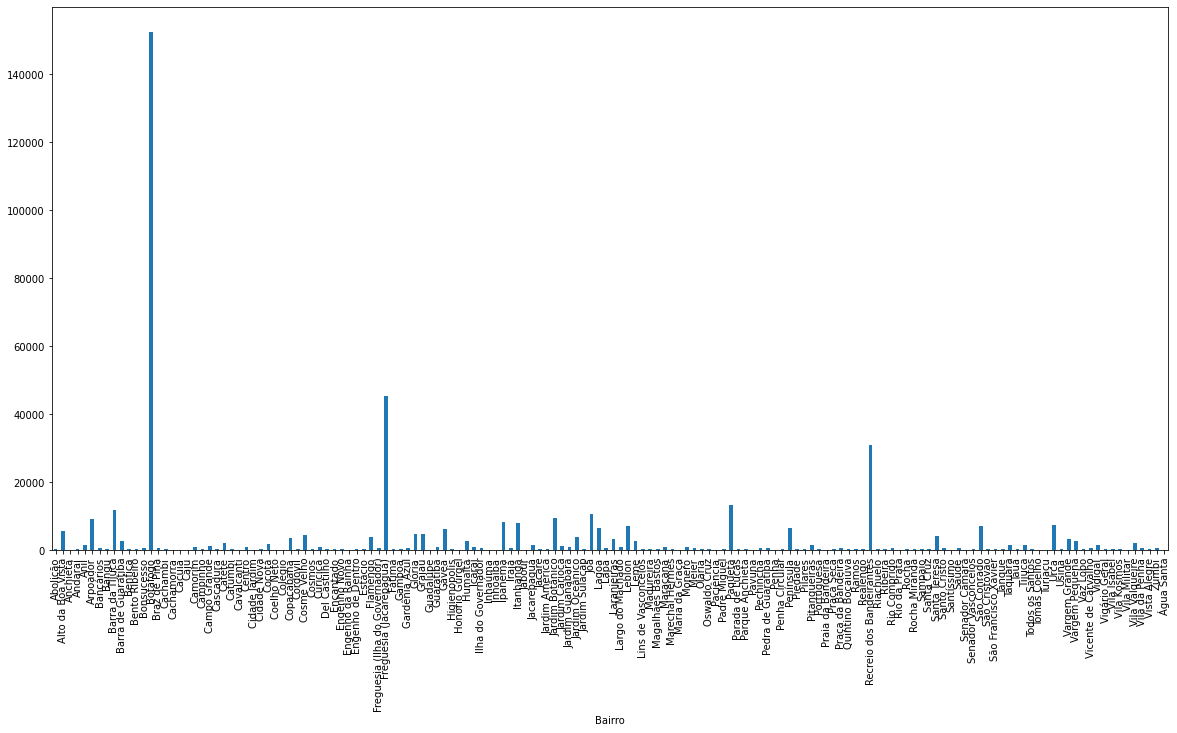

In [957]:
import matplotlib.pyplot as plt

plt.rc('figure', figsize = (20, 10)) # Setting figure size

# Plotting standard deviation of all 'Bairros'

dataset_groupby1['Valor'].std( ).plot.bar( )

Visualizing data, we can see that Botafogo has a very high standard deviation, when compared to other 'Bairros'.

Now let's look at the mean

Text(0.5, 1.0, 'Mean rent')

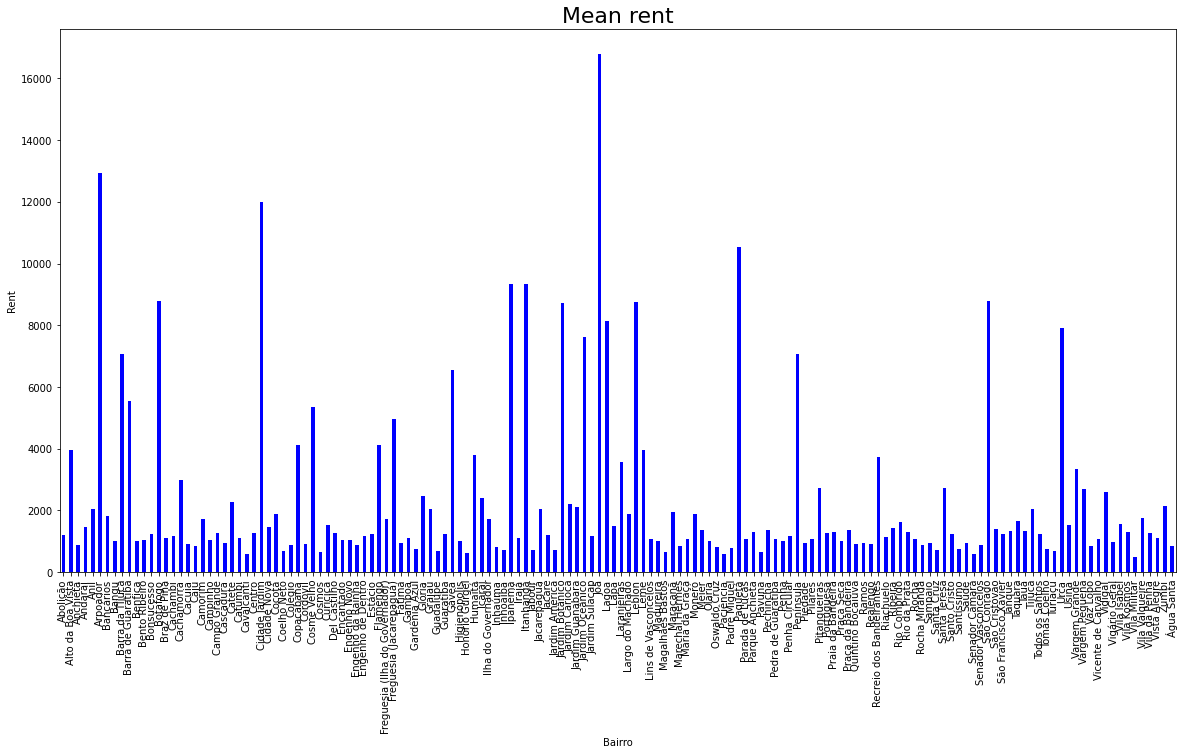

In [958]:

fig = dataset_groupby1['Valor'].mean( ).plot.bar(color = 'blue')

fig.set_ylabel('Rent')
fig.set_title('Mean rent', {'fontsize': 22})

## Extra: Creating a specific range of values

We might want to group data based on a range of values. For instance, we may want to count how many entries there are with:

*   1 or 2 rooms
*   3 or 4 rooms
*   5 or 6 rooms
*   7 or 8 rooms



We may use the *cut( )* method to perform this task.

In [959]:
classes = [-1, 2, 4, 6, 100]  # This list stores the range of values for defining the classes
                              # Note that, here, we exclude the first number and add the final one

rooms = pd.cut(dataset.Quartos, classes) # To include the lowest number, we can use *include_lowest = True*

In [960]:
rooms.head(10)

0    (-1, 2]
1    (-1, 2]
2    (-1, 2]
3    (-1, 2]
4    (-1, 2]
5     (4, 6]
6    (-1, 2]
7    (-1, 2]
8     (2, 4]
9    (-1, 2]
Name: Quartos, dtype: category
Categories (4, interval[int64, right]): [(-1, 2] < (2, 4] < (4, 6] < (6, 100]]

In [961]:
pd.value_counts(rooms)

(-1, 2]     11409
(2, 4]       9681
(4, 6]        686
(6, 100]       50
Name: Quartos, dtype: int64

We can create specific labels to improve our visualization

In [962]:
labels = ['0, 1 or 2 rooms', '3 or 4 rooms', '5 or 6 rooms', '7 or more rooms']
rooms = pd.cut(dataset['Quartos'], classes, labels = labels)

rooms

0        0, 1 or 2 rooms
1        0, 1 or 2 rooms
2        0, 1 or 2 rooms
3        0, 1 or 2 rooms
4        0, 1 or 2 rooms
              ...       
21821    0, 1 or 2 rooms
21822    0, 1 or 2 rooms
21823       3 or 4 rooms
21824    0, 1 or 2 rooms
21825    0, 1 or 2 rooms
Name: Quartos, Length: 21826, dtype: category
Categories (4, object): ['0, 1 or 2 rooms' < '3 or 4 rooms' < '5 or 6 rooms' < '7 or more rooms']

This tool helps in creating frequency distribuitions!

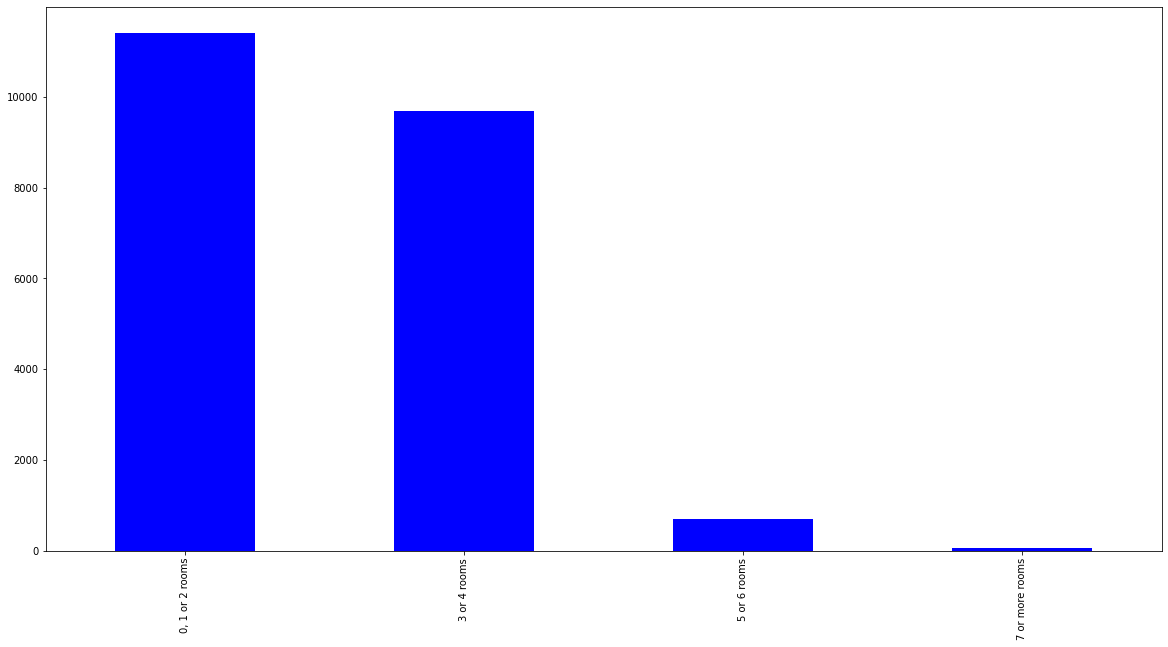

In [963]:
rooms.value_counts( ).plot.bar(color = 'blue')

# Removing outliers

When handling large datasets, we should expect some missing data, as well as some outliers. However, those outliers usually should not be considered in our analysis, as they may lead us to incorrect inferences. For instance, the mean of a given variable can be very misleading if we do not remove the outliers.

First, we have to identify those outliers. Thus, we need specific conditions to identify outliers in our data. 

One idea is to use a boxplot and its outlier-detection condition:

*Any data lower than $Q_1 - 1.5 \, IQQ$ and higher than $Q_3 + 1.5 \, IQQ$ is considered to be an outlier, where $Q_1$ is the first quartile, $Q_3$ is the third quartile, and $IQQ = Q_3 - Q_1$.*

In [964]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rc('figure', figsize = (14, 6))

Creating our boxplot, we can see that we have many outliers in our data (represented by the circles).

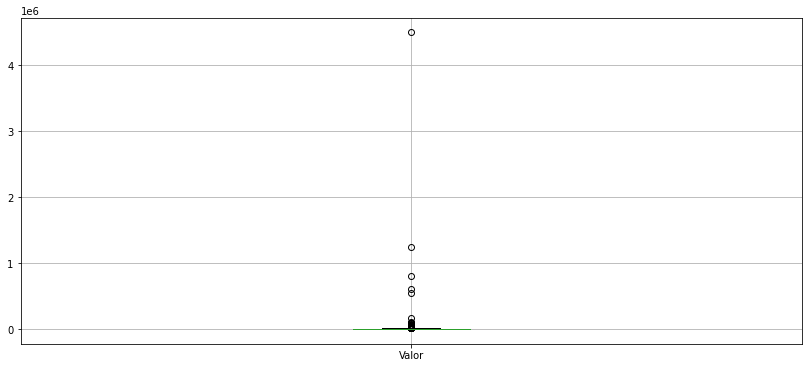

In [965]:
dataset.boxplot(['Valor'])

Let's remove our outliers based on the boxplot rule.

In [966]:
value = dataset.Valor

Q1 = value.quantile(.25)
Q3 = value.quantile(.75)
IQQ = Q3 - Q1

lb = Q1 - 1.5*IQQ
ub = Q3 + 1.5*IQQ

selection = (value >= lb) & (value <= ub)

dataset_v_corr = dataset[selection]
dataset_v_corr.index = [i for i in range(dataset[selection].shape[0])]

Now, we have our corrected dataset, with no outliers.

In [967]:
dataset_v_corr

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,VPSQM,Type (Agr)
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento
...,...,...,...,...,...,...,...,...,...,...,...
19809,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0,12.86,Apartamento
19810,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0,29.63,Apartamento
19811,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0,23.08,Apartamento
19812,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0,29.17,Apartamento


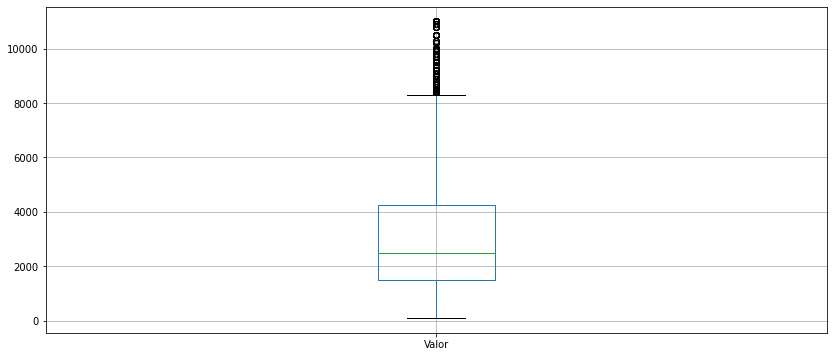

In [968]:
dataset_v_corr.boxplot(['Valor'])

Note that, again, our boxplot found some outliers in our data. However, one should analyze whether this data should be removed or not.

In summary, one should only remove outliers if one thinks that they come from errors in data gathering. If not, there is no reason to remove the outliers. In fact, by removing then, we may be losing some important insights from our data.

We can also draw a histogram from our data to help us in understanding our outliers.

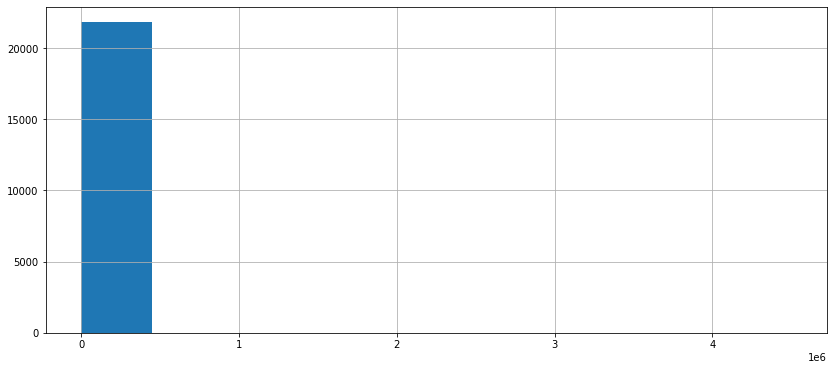

In [969]:
dataset['Valor'].hist( )

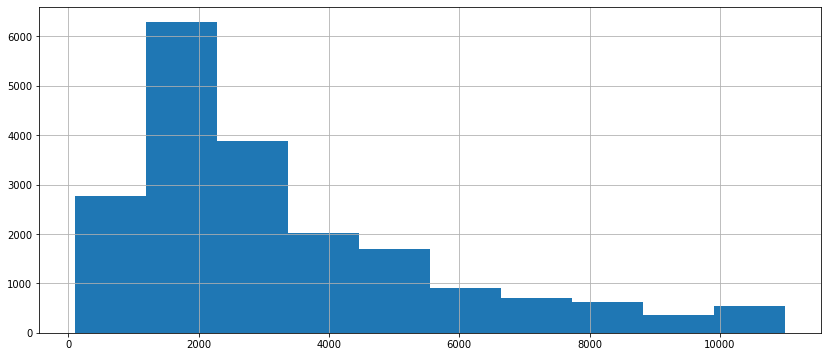

In [970]:
dataset_v_corr['Valor'].hist( )

Note that, after removing the initial outliers, our histogram is much more smooth.

We can also do the same procedure on different groups. For instance, using 'Tipo' to make different data groups:

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


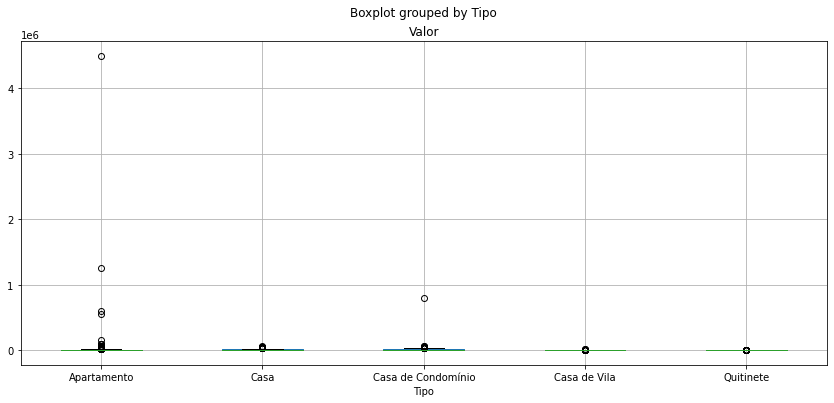

In [971]:
dataset.boxplot(['Valor'], by = 'Tipo')

Note that we expect that values for different house types might be very different. Thus, by removing outliers from all data, we are not considering natural differences in our data structure.

To fix that, we may remove outliers based on a given house type.

In [972]:
group_type = dataset.groupby('Tipo')['Valor']

In [973]:
Q1 = group_type.quantile(.25)
Q3 = group_type.quantile(.75)
IQQ = Q3 - Q1

lb = Q1 - 1.5*IQQ
ub = Q3 + 1.5*IQQ

Now we have evaluated the quantities of interest for all groups:

In [974]:
Q1

Tipo
Apartamento           1700.0
Casa                  1100.0
Casa de Condomínio    4000.0
Casa de Vila           750.0
Quitinete              900.0
Name: Valor, dtype: float64

In [975]:
Q3

Tipo
Apartamento            5000.0
Casa                   9800.0
Casa de Condomínio    15250.0
Casa de Vila           1800.0
Quitinete              1500.0
Name: Valor, dtype: float64

In [976]:
IQQ

Tipo
Apartamento            3300.0
Casa                   8700.0
Casa de Condomínio    11250.0
Casa de Vila           1050.0
Quitinete               600.0
Name: Valor, dtype: float64

In [977]:
lb

Tipo
Apartamento           -3250.0
Casa                 -11950.0
Casa de Condomínio   -12875.0
Casa de Vila           -825.0
Quitinete                 0.0
Name: Valor, dtype: float64

In [978]:
ub

Tipo
Apartamento            9950.0
Casa                  22850.0
Casa de Condomínio    32125.0
Casa de Vila           3375.0
Quitinete              2400.0
Name: Valor, dtype: float64

Now, creating our selection for each 'Tipo'

In [979]:
dataset_new = pd.DataFrame( )

for type_data in group_type.groups.keys( ):
  is_type = dataset['Tipo'] == type_data                                                     # Checking data type
  is_in_limits = ((dataset['Valor'] >= lb[type_data]) & (dataset['Valor'] <= ub[type_data])) # Checking if data is inside the limits

  sel = is_type & is_in_limits                                                               # Creating one boolean list

  dataset_new = pd.concat([dataset_new, dataset[sel]])                                       # Concatenating our final dataframe

Now, we have created a new dataset where outliers where removed based on their type!

In [980]:
dataset_new

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,VPSQM,Type (Agr)
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento
7,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,21.43,Apartamento
8,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,16.67,Apartamento
...,...,...,...,...,...,...,...,...,...,...,...
21687,Quitinete,Glória,1,0,0,10,400.0,107.0,10.0,40.00,Apartamento
21728,Quitinete,Flamengo,1,0,0,23,900.0,605.0,0.0,39.13,Apartamento
21748,Quitinete,Centro,1,0,0,24,1100.0,323.0,0.0,45.83,Apartamento
21815,Quitinete,Copacabana,1,0,0,22,1500.0,286.0,200.0,68.18,Apartamento


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


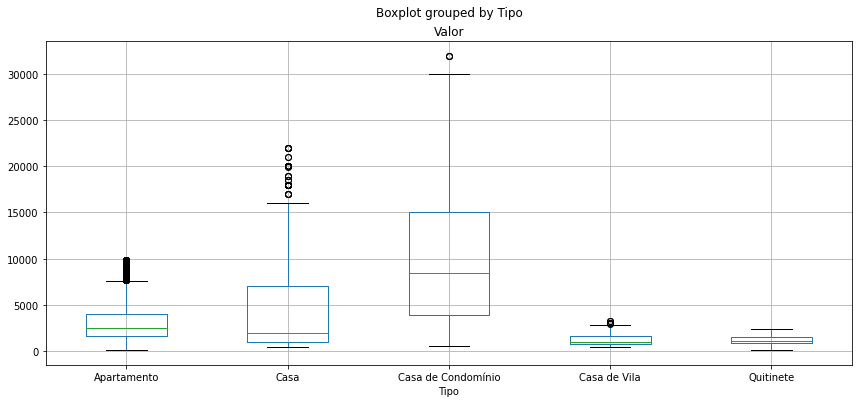

In [981]:
dataset_new.boxplot('Valor', by = 'Tipo')

Now, our boxplot looks much better. Note that, on 'Tipo' == 'Casa de Condominio', values are much higher. When we removed the outliers in the first time, we certainly removed a lot of important data from this type that we should not have removed.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd290209f50>,
      dtype=object)

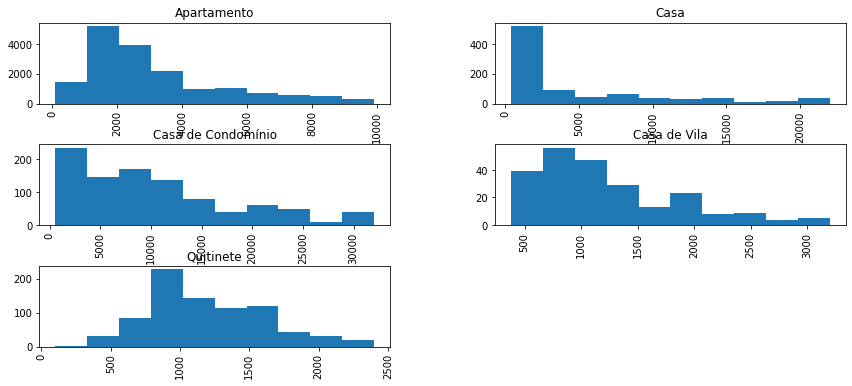

In [982]:
dataset_new.hist('Valor', by = 'Tipo')

Saving our new data, after removing the outliers

In [983]:
dataset_new.to_csv('residential_no_outliers.csv', sep = ';', index = False)

In [984]:
%reset-f

## Extra 01: More about data visualization

Matplotlib is a very strong tool for data visualization. Here, we will learn how to use and edit figures using this package.

In [985]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rc('figure', figsize = (15, 8))

dataset = pd.read_csv('residential_no_outliers.csv', sep = ';')

In [986]:
dataset.head( )

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,VPSQM,Type (Agr)
0,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
1,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
2,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento
3,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,21.43,Apartamento
4,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,16.67,Apartamento


First, we can define the area for our figure as in:

In [987]:
area_fig = plt.figure( )

<Figure size 1080x576 with 0 Axes>

Then, we can define some subplots so that we can better handle our figure area.

In [988]:
g1 = area_fig.add_subplot(2, 2, 1)

In [989]:
g2 = area_fig.add_subplot(2, 2, 2)
g3 = area_fig.add_subplot(2, 2, 3)
g4 = area_fig.add_subplot(2, 2, 4)

Each $g_i$ corresponds to a graph. Note that we are using a 2 x 2 space, and $g_1$ corresponds to graph 1, $g_2$ to graph 2, and so on.

$g_1$ is going to be a scatter plot, relating 'Valor' and 'Area'

In [990]:
g1.scatter(dataset['Valor'], dataset['Area'])
g1.set_title('Valor vs Area')
g1.set_ylabel('Valor')
g1.set_ylabel('Area')

Text(0, 0.5, 'Area')

Note that our variable *area_fig* changed, and a scatter plot was drawn in position 1.

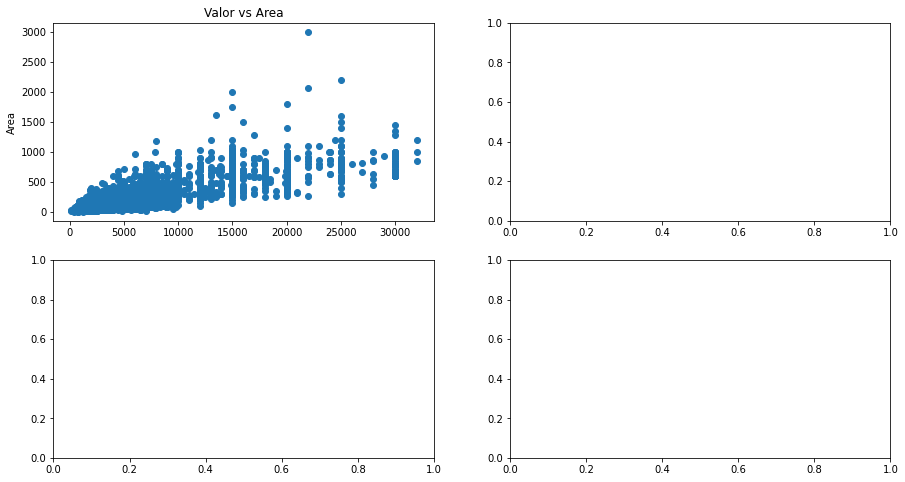

In [991]:
area_fig

Graph 2 will be a histogram, built using 'Valor'

In [992]:
g2.hist(dataset['Valor'], color = 'red')

g2.set_title('Histogram')
g2.set_xlabel('Value')

Text(0.5, 240.4072727272727, 'Value')

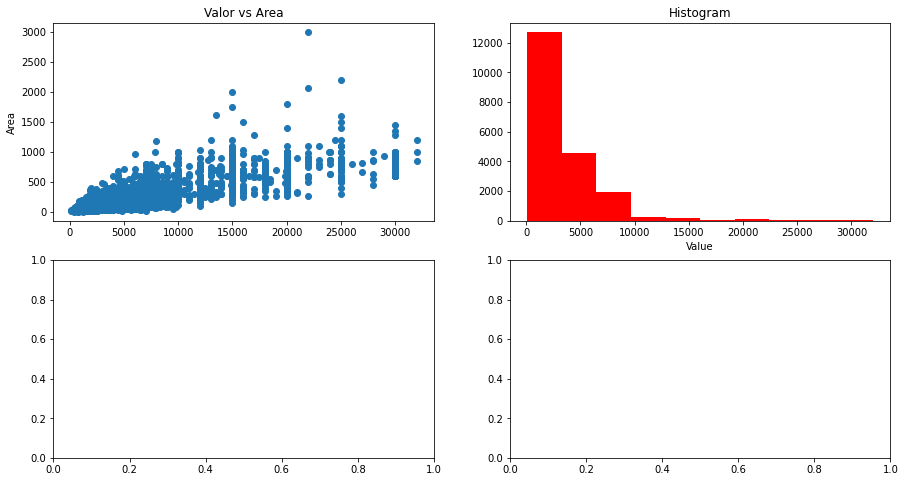

In [993]:
area_fig

Graph 3 will be given be a random sample from our data frame

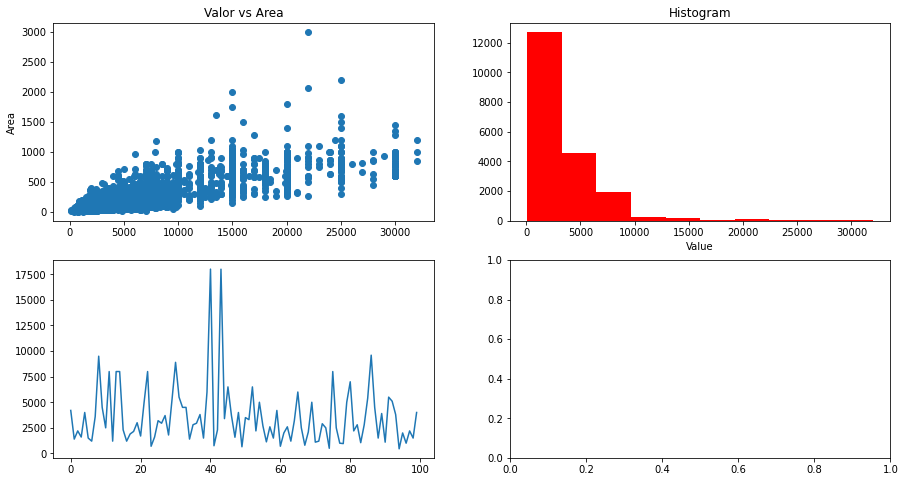

In [994]:
data_g3 = dataset.Valor.sample(100)
data_g3.index = [i for i in range(100)]

g3.plot(data_g3)

area_fig

Finally, graph 4 is a bar graph, created based on 'Tipo', and showing the mean values for each group



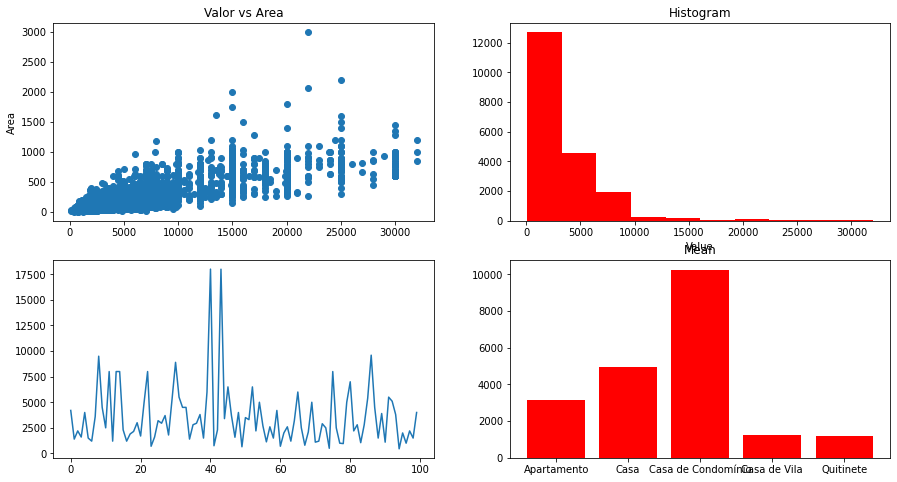

In [995]:
group_type = dataset.groupby('Tipo')['Valor']

label  = group_type.mean( ).index
mean_v = group_type.mean( ).values
g4.bar(label, mean_v, color = 'red')
g4.set_title('Mean')

area_fig

We may save our figure from matplotlib using *savefig( )*

In [997]:
area_fig.savefig('figure_matplotlib.png', dpi = 300, bbox_inches = 'tight')

## Extra 02: Even more about data visualization

We can also use matplotlib to create pie plots

([<matplotlib.patches.Wedge at 0x7fd2937aa390>,
 [Text(-1.0749003019616512, 0.5334691564118319, 'Apartamento'),
  Text(0.853854526783638, -0.843168101324457, 'Casa'),
  Text(1.0620983445123797, -0.5585222525415284, 'Casa de Condomínio'),
  Text(1.1483370116299805, -0.3483132321929876, 'Casa de Vila'),
  Text(1.190061000591247, -0.15412597078935109, 'Quitinete')],
 [Text(-0.6270251761442964, 0.3111903412402352, '85.3%'),
  Text(0.49808180729045554, -0.49184805910593316, '4.5%'),
  Text(0.6195573676322214, -0.32580464731589154, '4.9%'),
  Text(0.6698632567841553, -0.20318271877924277, '1.2%'),
  Text(0.6942022503448941, -0.08990681629378813, '4.1%')])

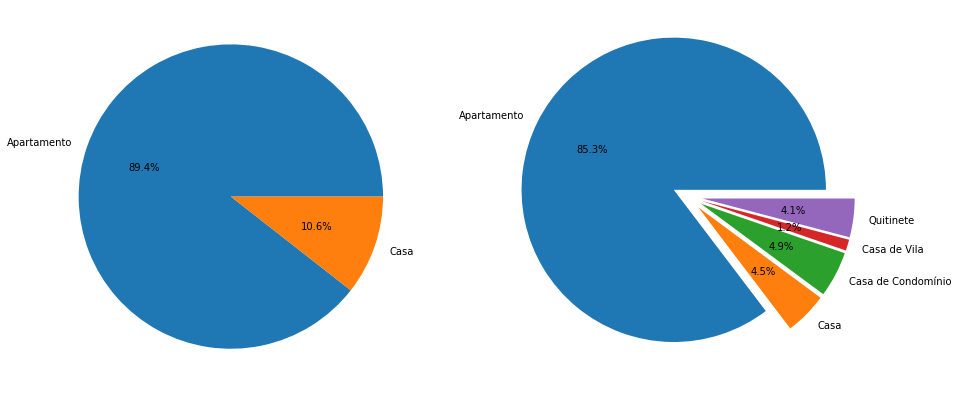

In [1006]:
area_fig2 = plt.figure( )

# Creating graph placements

G1 = area_fig2.add_subplot(1, 2, 1)  
G2 = area_fig2.add_subplot(1, 2, 2)

# Grouping data

group1 = dataset.groupby('Type (Agr)')['Valor']

# Getting values and labels

label  = group1.count( ).index
val_c1 = group1.count( ).values

# Printing pie plot

G1.pie(val_c1, labels = label, autopct = '%1.1f%%') # autopct -> prints the percentage

# Grouping data

group2 = dataset.groupby('Tipo')['Valor']

# Getting values and labels

label  = group2.count( ).index 
val_c2 = group2.count( ).values

# Printing pie plot

G2.pie(val_c2, labels = label, autopct = '%1.1f%%', explode = (.1, .1, .1, .1, .1)) # explode: makes the parts of the pie stand out